### Traveler travel data
- data source: https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data/data 
- 키워드: 성별

- 성별에 따른 여행비용 (교통비/숙박비) 상관관계 분석 (평균, 표준편차)
- 성별에 따른 여행기간 분석 히스토그램(평균, 표준편차)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import koreanize_matplotlib
import seaborn as sns

%matplotlib inline

In [3]:
# 데이터 로드
rawDF = pd.read_csv('./Travel_details_dataset.csv')
rawDF.head(5)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600.0
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500.0
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700.0
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000.0
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200.0


In [4]:
rawDF.describe(include='all')

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
count,137.000000,137,137,137,137.000000,137,137.000000,137,137,137,137.000000,136,136.000000
unique,NaN,59,111,125,NaN,109,NaN,2,41,8,NaN,9,NaN
top,NaN,Paris,8/15/2023,7/8/2023,NaN,John Smith,NaN,Female,American,Hotel,NaN,Plane,NaN
freq,NaN,7,4,3,NaN,6,NaN,70,24,60,NaN,57,NaN
mean,69.000000,NaN,NaN,NaN,7.605839,NaN,33.175182,NaN,NaN,NaN,1245.109489,NaN,645.183824
std,39.692569,NaN,NaN,NaN,1.601276,NaN,7.145441,NaN,NaN,NaN,1337.349836,NaN,584.476153
min,1.000000,NaN,NaN,NaN,5.000000,NaN,20.000000,NaN,NaN,NaN,100.000000,NaN,20.000000
25%,35.000000,NaN,NaN,NaN,7.000000,NaN,28.000000,NaN,NaN,NaN,600.000000,NaN,200.000000
50%,69.000000,NaN,NaN,NaN,7.000000,NaN,31.000000,NaN,NaN,NaN,900.000000,NaN,550.000000
75%,103.000000,NaN,NaN,NaN,8.000000,NaN,38.000000,NaN,NaN,NaN,1200.000000,NaN,800.000000


In [5]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               137 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    int64  
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    int64  
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    int64  
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    float64
dtypes: float64(1), int64(4), object(8)
memory usage: 14.0+ KB


In [7]:
# 결측치 확인
rawDF.isnull().sum()

Trip ID                 0
Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler name           0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     1
Transportation cost     1
dtype: int64

In [6]:
# 결측치 제거
rawDF = rawDF.dropna()

In [7]:
# 여행자 이름 칼럼 삭제
# traveler = rawDF.drop(rawDF['Traveler name'])
rawDF.drop('Traveler name', axis=1)
rawDF.head(5)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600.0
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500.0
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700.0
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000.0
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200.0


In [9]:
rawDF.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

#### 상관계수

In [8]:
rawDF.corr(numeric_only=True)

,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost
Trip ID,1.000000,-0.039378,0.064700,0.345273,0.445192
Duration (days),-0.039378,1.000000,-0.118039,-0.129948,-0.001185
Traveler age,0.064700,-0.118039,1.000000,0.039396,0.054533
Accommodation cost,0.345273,-0.129948,0.039396,1.000000,0.787319
Transportation cost,0.445192,-0.001185,0.054533,0.787319,1.000000


숙박비용과 교통비용 간에 높은 상관관계를 가짐<br>
경제적 여유가 있는 여행자일수록 숙박비&교통비에 있어 투자를 많이 하는 경향

#### 여행자 성별 비율 pie chart

In [9]:
# gender_group = rawDF.groupby['Traveler gender']

print(set(rawDF['Traveler gender'].values))
gender = set(rawDF['Traveler gender'].values)
gender_counts = [0] * 2

for i, value in enumerate(gender):
	gender_counts[i] = sum((rawDF['Traveler gender'] == value))

gender_counts


{'Female', 'Male'}


[70, 66]

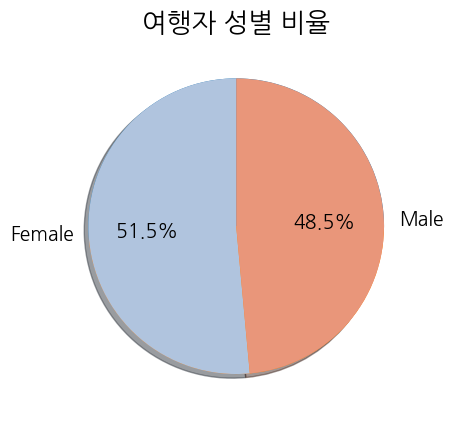

In [10]:
plt.pie(gender_counts, )


xx = list(gender)
yy = gender_counts

colors = plt.cm.tab20.colors

plt.title(
    label="여행자 성별 비율", 
    fontdict={"fontsize":19},
    pad=8
)

plt.pie(yy, labels=xx, autopct='%.1f%%', startangle=90, colors=['lightsteelblue','darksalmon'], shadow=True,
        textprops={'fontsize':14})
plt.show()


여행자 집단에서 성별에 따른 집단 수 차이가 유의미하게 없음<br>
여행을 하는 데 있어 성별에 따른 차이 확인 불가

#### 성별에 따른 여행기간 (days) 분포 차이
- 여행기간 히스토그램 남녀 성별 집단별로
- 남녀 그룹에 따른 여행기간 boxplot

#### 독립표본 t-test 검정
출처: https://wikidocs.net/227313

##### 1. 데이터 정규성 만족 확인
##### 2. 두 집단의 분산이 동일한지 확인
	- 이때) 귀무가설은 두 집단의 분산이 동일하다 -> p-value > 0.05
	- 동일하면 -> two sample t-test 시행
	- 동일 X   -> whelch's test 시행

In [48]:
# female_d = rawDF.query('Traveler gender == Female')['Duration (days)']
# male_d = rawDF.query('Traveler gender == Male')['Duration (days)']
female_d = rawDF['Duration (days)'][rawDF['Traveler gender']=='Female']
male_d = rawDF['Duration (days)'][rawDF['Traveler gender']=='Male']
male_d, female_d

(0      7
 2      7
 5      5
 7      7
 9      7
       ..
 128    9
 130    7
 132    9
 134    7
 136    7
 Name: Duration (days), Length: 67, dtype: int64,
 1       5
 3      14
 4       7
 6      10
 8       7
        ..
 127     7
 129     6
 131     7
 133     6
 135     7
 Name: Duration (days), Length: 70, dtype: int64)

<Axes: xlabel='Traveler gender', ylabel='Duration (days)'>

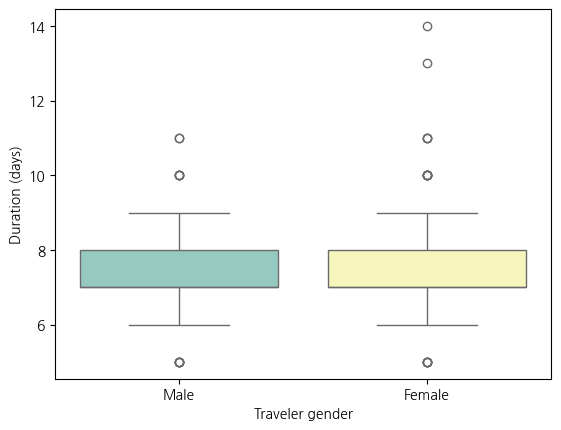

In [50]:

sns.boxplot(x='Traveler gender', y='Duration (days)', hue='Traveler gender',
            data=rawDF, palette='Set3')

성별에 따른 여행기간 분포 차이가 뚜렷하게 드러나지 않음

#### 정규성 검사
- 데이터의 정규분포 여부 검사 ( 평균 중심 얼마나 데이터가 밀집되어 있는가)
- 정규성 가정은 두 그룹의 표본 크기가  클 때보다 작을 때 더 중요합니다.

정규 분포는 대칭으로, 중심에서 양쪽으로 "균등"하게 분포된 것을 의미입니다. 정규 분포에는 극단값 또는 이상치가 없습니다. 
- 데이터가 정규분포를 따른다면, 해당 데이터 분석 시 모수 데이터 대변 가능
- Kolmogorov-Smirnov와 Shapiro-Wilk의 정규성 검정

출처: https://m.blog.naver.com/brainphd5044/221532650725


- 왜도와 첨도를 이용하여 정규성을 검정하기도 하는데, West 등(1995)의 연구에서는 왜도는 2, 첨도는 7보다 작으면 정규분포와 비슷하여 정규분포를 이룬다고 알려져있다. 
- 중심극한 정리에 의하면 샘플이 30개이상이 되면 표본의 분포른 정규분포를 이룬다고 했으나, 대체로 리커트 척도로 분석하는 경우가 많아 정확히 정규성 검정을 해야 한다.

#### 테스트
https://signature95.tistory.com/14

In [52]:
female_d_mean = female_d.mean()
male_d_mean = male_d.mean()

#### Normal-test

In [ ]:
from scipy import stats

In [58]:
stats.normaltest(female_d)

NormaltestResult(statistic=17.978503099847174, pvalue=0.0001247434225311854)

In [65]:
stats.normaltest(male_d)

NormaltestResult(statistic=2.7293207850666947, pvalue=0.25546741990108857)

#### Anderson-test
- 특정 분포를 따른다: 귀무가설

In [61]:
anderson_reslt = stats.anderson(female_d)
print(f'검정통계치: {anderson_reslt[0]}')
print(f'임계지점의 통계치: {anderson_reslt[1]}')
print(f'각 임계지점의 P-value: {anderson_reslt[2]}')

검정통계치: 2.4650218074370116
임계지점의 통계치: [0.548 0.624 0.748 0.873 1.038]
각 임계지점의 P-value: [15.  10.   5.   2.5  1. ]


p값이 5%일 때의 통계치 < 검정 통계치<br>
따라서, 정규분포를 따른다는 귀무가설 유의하게 기각ㅠㅠㅠ

In [62]:
anderson_reslt = stats.anderson(male_d)
print(f'검정통계치: {anderson_reslt[0]}')
print(f'임계지점의 통계치: {anderson_reslt[1]}')
print(f'각 임계지점의 P-value: {anderson_reslt[2]}')

검정통계치: 2.90199652852543
임계지점의 통계치: [0.546 0.622 0.747 0.871 1.036]
각 임계지점의 P-value: [15.  10.   5.   2.5  1. ]


##### Shapiro test
- 표본 개수 50개 미만
- p-value > 0.05 ==> 정규성 보장

In [53]:
sha_f, f_pvalue = stats.shapiro(female_d)
sha_m, m_pvalue = stats.shapiro(male_d)

In [55]:
#정규성 검정 
print("정규성검정 결과(Checking the Normality of Data) \n")
print(f'1. 여성 여행자 여행기간 의 통계량: {sha_f:.3f} \n 여성 여행자 그룹의 p-value = {f_pvalue:.3f}이다. \n')
print(f'2. 남성 여행자 여행기간 의 통계량: {sha_m:.3f} \n 남성 여행자 그룹의 p-value = {m_pvalue:.3f}이다. ')

정규성검정 결과(Checking the Normality of Data) 

1. 여성 여행자 여행기간 의 통계량: 0.898 
 여성 여행자 그룹의 p-value = 0.000이다. 

2. 남성 여행자 여행기간 의 통계량: 0.911 
 남성 여행자 그룹의 p-value = 0.000이다. 


p-value가 0이 되는 건 불가능<br>
자동 반올림 or 소수점 이하 절삭으로 인한 결과<br>
"p < 0.01" p는 언제나 0< <1

#### Boxplot

In [38]:
fig = go.Figure()

for sex in rawDF['Traveler gender'].unique():
    fig.add_trace(go.Box(y=rawDF[rawDF['Traveler gender']==sex]['Duration (days)'],
                         name=sex))


fig.show()

In [13]:
gender_days_DF = rawDF.loc[:,['Duration (days)','Traveler gender']]
gender_days_DF.head(5)

,Duration (days),Traveler gender
0,7,Male
1,5,Female
2,7,Male
3,14,Female
4,7,Female


[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


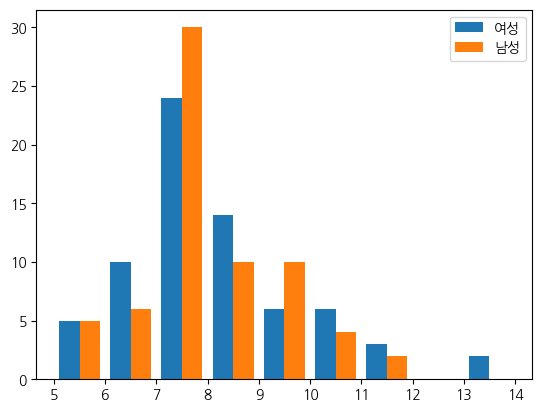

In [14]:

female_mask = gender_days_DF['Traveler gender'] == 'Female'
male_mask = gender_days_DF['Traveler gender'] == 'Male'

x = gender_days_DF[female_mask]['Duration (days)']
y = gender_days_DF[male_mask]['Duration (days)']
bins = np.linspace(gender_days_DF['Duration (days)'].min(), gender_days_DF['Duration (days)'].max(), 10)
print(bins)

plt.hist([x, y], bins, label=['여성', '남성'])
plt.xticks(bins)
plt.legend(loc='upper right')
plt.show()

In [15]:
female_dura = np.array(x)
male_dura = np.array(y)

In [23]:
# 여성 여행자그룹 여행기간 평균, 표준편차
print(f'여성 여행자 여행기간 평균: {np.mean(female_dura)}일')
print(f'여성 여행자 여행기간 표준편차: {np.std(female_dura)}일')


여성 여행자 여행기간 평균: 7.7일
여성 여행자 여행기간 표준편차: 1.7756286613076349일


In [24]:
print(f'남성 여행자 여행기간 평균: {np.mean(male_dura)}일')
print(f'남성 여행자 여행기간 표준편차: {np.std(male_dura)}일')

남성 여행자 여행기간 평균: 7.507462686567164일
남성 여행자 여행기간 표준편차: 1.3754037054935253일


### 남녀에 따른 숙박비

<Axes: xlabel='Traveler gender', ylabel='Accommodation cost'>

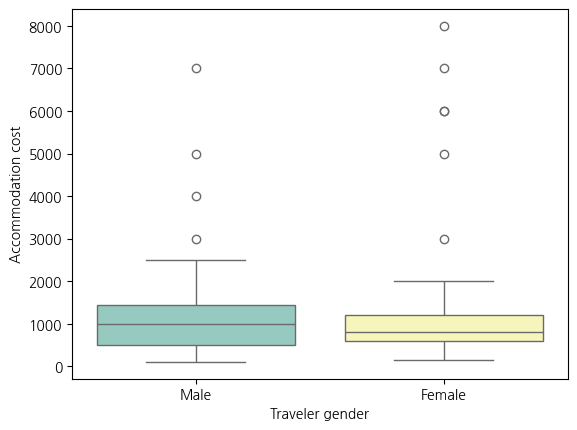

In [63]:
sns.boxplot(x='Traveler gender', y='Accommodation cost', hue='Traveler gender',
            data=rawDF, palette='Set3')

In [68]:
female_A = rawDF['Accommodation cost'][rawDF['Traveler gender']=='Female']
male_A = rawDF['Accommodation cost'][rawDF['Traveler gender']=='Male']
male_A, female_A

(0      1200
 2      1000
 5      1500
 7       900
 9      2500
        ... 
 128    3000
 130    4000
 132    2500
 134    2000
 136    7000
 Name: Accommodation cost, Length: 67, dtype: int64,
 1       800
 3      2000
 4       700
 6       500
 8      1200
        ... 
 127    7000
 129    6000
 131    8000
 133    5000
 135    6000
 Name: Accommodation cost, Length: 70, dtype: int64)

#### 정규성 확인

In [69]:
stats.normaltest(female_A)

NormaltestResult(statistic=67.19492170372665, pvalue=2.563351400277665e-15)

In [70]:
stats.normaltest(male_A)

NormaltestResult(statistic=66.29575362845966, pvalue=4.018463359525097e-15)

In [71]:
sha_f, f_pvalue = stats.shapiro(female_A)
sha_m, m_pvalue = stats.shapiro(male_A)

In [72]:
#정규성 검정 
print("정규성검정 결과(Checking the Normality of Data) \n")
print(f'1. 여성 여행자 여행기간 의 통계량: {sha_f:.3f} \n 여성 여행자 그룹의 p-value = {f_pvalue:.3f}이다. \n')
print(f'2. 남성 여행자 여행기간 의 통계량: {sha_m:.3f} \n 남성 여행자 그룹의 p-value = {m_pvalue:.3f}이다. ')

정규성검정 결과(Checking the Normality of Data) 

1. 여성 여행자 여행기간 의 통계량: 0.540 
 여성 여행자 그룹의 p-value = 0.000이다. 

2. 남성 여행자 여행기간 의 통계량: 0.705 
 남성 여행자 그룹의 p-value = 0.000이다. 


#### 남녀에 따른 교통비

<Axes: xlabel='Traveler gender', ylabel='Transportation cost'>

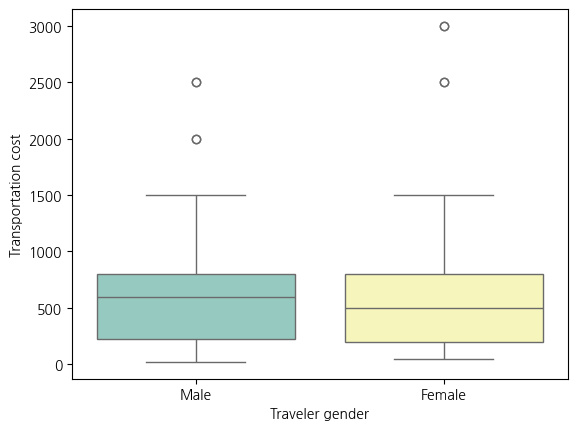

In [66]:
sns.boxplot(x='Traveler gender', y='Transportation cost', hue='Traveler gender',
            data=rawDF, palette='Set3')

In [77]:
female_T = rawDF['Transportation cost'][rawDF['Traveler gender']=='Female']
male_T = rawDF['Transportation cost'][rawDF['Traveler gender']=='Male']
male_T, female_T

(0       600.0
 2       700.0
 5       800.0
 7       600.0
 9       800.0
         ...  
 128    2000.0
 130    1500.0
 132    2000.0
 134    1000.0
 136    2500.0
 Name: Transportation cost, Length: 66, dtype: float64,
 1       500.0
 3      1000.0
 4       200.0
 6      1200.0
 8       200.0
         ...  
 127    1500.0
 129    3000.0
 131    2500.0
 133    3000.0
 135    2500.0
 Name: Transportation cost, Length: 70, dtype: float64)

In [74]:
stats.normaltest(female_T)

NormaltestResult(statistic=42.89287763975143, pvalue=4.852102470387242e-10)

In [78]:
stats.normaltest(male_T)

NormaltestResult(statistic=35.51974497164999, pvalue=1.936356778183116e-08)

In [21]:
import plotly.express as px

# 그래프 그리기
fig = px.scatter(rawDF, x='Duration (days)', y='Accommodation cost', trendline='ols', 
                 color='Traveler gender')
fig.show()

- 7일 이하 여행 기간 여행자 그룹에서 여성 여행자가 숙소에 더 많은 비용을 지불하는 경향

In [25]:
import plotly.express as px

# 그래프 그리기
fig = px.scatter(rawDF, x='Duration (days)', y='Transportation cost', trendline='ols', 
                 color='Traveler gender')

fig.show()

- 숙박 기간에 따른 교통비 지출은 남녀 그룹에 따른 유의미한 차이가 보이지 않음
- 1000달러가 기준인듯??

In [20]:
import plotly.express as px

# 그래프 그리기
fig = px.scatter(rawDF, x='Transportation cost', y='Accommodation cost', trendline='ols',
                 color='Traveler gender')
fig.show()

In [28]:
숙박비와 교통비 지출 간에 높은 상관관계

In [33]:
fig = go.Figure()

for sex in rawDF['Traveler gender'].unique():
    fig.add_trace(go.Box(y=rawDF[rawDF['Traveler gender']==sex]['Transportation cost'],
                         name=sex))


fig.show()

In [34]:
fig = go.Figure()

for sex in rawDF['Traveler gender'].unique():
    fig.add_trace(go.Box(y=rawDF[rawDF['Traveler gender']==sex]['Accommodation cost'],
                         name=sex))


fig.show()

In [31]:
# transportation cost null 삭제
nonull_DF = rawDF.copy()
nonull_DF = nonull_DF.dropna()
nonull_DF.head(5)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600.0
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500.0
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700.0
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000.0
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200.0


In [37]:
fig = px.scatter(nonull_DF, x='Duration (days)', y='Accommodation cost', color='Traveler gender',
                 size='Transportation cost')

fig.update_layout(title='Trip Duration, Accommodation Cost, and Transportation Cost by Traveler Gender',
                  xaxis_title='Duration (days)',
                  yaxis_title='Accommodation cost')

fig.show()

In [81]:
fig = px.scatter(nonull_DF, x='Duration (days)', y='Transportation cost', color='Traveler gender',
                 size='Accommodation cost')

fig.update_layout(title='Trip Duration, Accommodation Cost, and Transportation Cost by Traveler Gender',
                  xaxis_title='Duration (days)',
                  yaxis_title='Transportation cost')

fig.show()

In [ ]:

foo = gender_days_DF[female_mask]['Duration (days)']
bar = gender_days_DF[male_mask]['Duration (days)']

_, bins, _ = plt.hist(foo, bins=50, range=[4, 15])
_ = plt.hist(bar, bins=bins, alpha=0.5)